In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import datasets,svm,metrics

In [4]:
df_digits = datasets.load_digits()

In [5]:
print('keys \n{}'.format(df_digits.keys()))

keys 
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


64
64
64
64


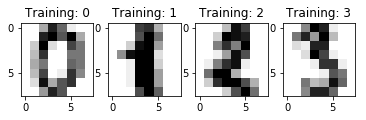

In [7]:
for i in range(0,4):
    plt.subplot(2, 4,i+1)
    plt.axis('on')
    imside = int(np.sqrt(df_digits.data[i].shape[0]))
    print(df_digits.data[i].shape[0])
    
    im1 = np.reshape(df_digits.data[i],(imside,imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(df_digits.target[i]))
plt.show()
    

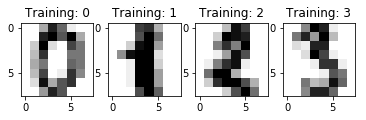

In [9]:
for i in range(0,4):
    plt.subplot(2, 4,i + 1)
    plt.axis('on')
    plt.imshow(df_digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(df_digits.target[i]))
plt.show()

In [10]:
n_samples = len(df_digits.images)
n_samples

1797

In [11]:
data_images = df_digits.images.reshape((n_samples,-1))

In [12]:
data_images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images,df_digits.target)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1347, 64), (1347,)
Test data and target sizes: 
(450, 64), (450,)


In [14]:
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.97      1.00      0.99        37
          2       1.00      1.00      1.00        46
          3       1.00      1.00      1.00        44
          4       1.00      1.00      1.00        49
          5       1.00      0.98      0.99        41
          6       0.97      1.00      0.99        37
          7       1.00      0.98      0.99        55
          8       1.00      0.98      0.99        52
          9       0.98      1.00      0.99        41

avg / total       0.99      0.99      0.99       450




In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy Score = " + str(accuracy_score(y_test,y_pred)))

Accuracy Score = 0.9933333333333333
